# Convolutional Neural Network Inception Model V3

Build a CNN using Tensorflow and Keras to classify Cans. The Colombian_cans_240x320 dataset consists in 2590 colour images, divided in 6 classes. There are 1812 training images, 389 validation images and 389 test images.

- Author: Sergio Luis Beleño Díaz
- Date: 2020-02-05



## Setup


Install and import TensorFlow and dependencies:


In [1]:
!pip install h5py pyyaml
import h5py

from google.colab import drive,files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
hdf5_path = '/content/drive/My Drive/Colombian_cans_240x320.hdf5'

dataset = h5py.File(hdf5_path, "r")


## Exploratory Data Analysis

Using TensorFlow backend.



Black                           [1 0 0 0 0 0]
DefectiveRed                    [0 1 0 0 0 0]
DefectiveGolden                 [0 0 1 0 0 0]
Golden                          [0 0 0 1 0 0]
Red                             [0 0 0 0 1 0]
DefectiveBlack                  [0 0 0 0 0 1]

Salida:                        [0. 0. 0. 0. 1. 0.]


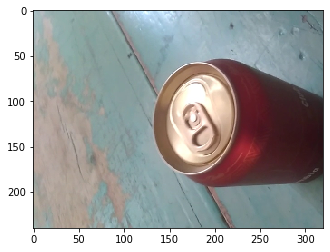

In [3]:
import tensorflow as tf
import numpy as np
import keras, os
from keras import backend as k
from keras.models import Model
from keras.layers import Dense,Dropout,Flatten,Input
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.optimizers import SGD,Adam
from keras.applications import inception_v3
import matplotlib.pylab as plt

# Parameters
batch_size = 20
num_classes = 6
num_epochs = 40

# Size
filas,columnas = 240,320
img_shape = (filas, columnas, 3)

#train
train_img = dataset["train_img"]

xt = np.array(train_img)
yt = np.array(dataset["train_labels"])

#test
xtest = np.array(dataset["test_img"])
ytest = np.array(dataset["test_labels"])

#Validation
xval = np.array(dataset["val_img"])
yval = np.array(dataset["val_labels"])

#'Black': 0                          [1 0 0 0 0 0]
#'DefectiveRed': 1                   [0 1 0 0 0 0]
#'DefectiveGolden': 2                [0 0 1 0 0 0]
#'Golden': 3                         [0 0 0 1 0 0]
#'Red': 4                            [0 0 0 0 1 0]
#'DefectiveBlack': 5                 [0 0 0 0 0 1]

#Categorical values or OneHot
yt = keras.utils.to_categorical(yt,num_classes)
ytest = keras.utils.to_categorical(ytest,num_classes)
yval = keras.utils.to_categorical(yval,num_classes)

print()
print("Black                           [1 0 0 0 0 0]")
print("DefectiveRed                    [0 1 0 0 0 0]")
print("DefectiveGolden                 [0 0 1 0 0 0]")
print("Golden                          [0 0 0 1 0 0]")
print("Red                             [0 0 0 0 1 0]")
print("DefectiveBlack                  [0 0 0 0 0 1]")

#Image
num_de_imagen = 20

print()
print("Salida:                        "+ str(yt[num_de_imagen]))

imagen =  train_img[num_de_imagen]
plt.imshow(imagen)
plt.show()

As we can see, the images in the dataset have a dimension of 240x320x3

In [4]:
#Get the shape of x_train
print('x_train shape:     ', xt.shape)
#Get the shape of y_train
print('y_train shape:     ', yt.shape)
#Get the shape of x_validation
print('x_validation shape:', xval.shape)
#Get the shape of y_validation
print('y_validation shape:', yval.shape)
#Get the shape of x_test
print('x_test shape:      ', xtest.shape)
#Get the shape of y_test
print('y_test shape:      ', ytest.shape)

x_train shape:      (1812, 240, 320, 3)
y_train shape:      (1812, 6)
x_validation shape: (389, 240, 320, 3)
y_validation shape: (389, 6)
x_test shape:       (389, 240, 320, 3)
y_test shape:       (389, 6)


## Model Setup

In [5]:
#Inputs
inputs = Input(shape=img_shape, name='images')
#Inception Model
output = inception_v3.InceptionV3(include_top=False,weights=None, 
                                  input_shape=img_shape,
                                  classes = num_classes)(inputs)
#Flattened
output = Flatten()(output)
#Dense layer
output = Dense(num_classes, activation='softmax',name='output')(output)

#Checkpoint_path
checkpoint_path = "/content/drive/My Drive/checkpoint/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_best_only=True, 
                                                 verbose=1)

#Model
modelo = Model(inputs=inputs, outputs=output)

ADAM = Adam(lr=0.0001)
modelo.compile(loss='categorical_crossentropy',optimizer=ADAM,
               metrics=['categorical_accuracy'])

#Summary
modelo.summary()
















Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
images (InputLayer)          (None, 240, 320, 3)       0         
_________________________________________________________________
inception_v3 (Model)         (None, 6, 8, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 98304)             0         
_________________________________________________________________
output (Dense)               (None, 6)                 589830    
Total params: 22,392,614
Trainable params: 22,358,182
Non-trainable params: 34,432
_________________________________________________________________


## Traning

The primary use case is to automatically save checkpoints *during* and at *the end* of training. This way you can use a trained model without having to retrain it, or pick-up training where you left of—in case the training process was interrupted.

#### Checkpoint callback usage

Train the model and pass it the `ModelCheckpoint` callback:

In [6]:
modelo.fit({'images': xt}, {'output': yt}, batch_size=batch_size,
           epochs=num_epochs, validation_data=(xval, yval),shuffle=True)

puntuacion = modelo.evaluate(xtest,ytest,verbose=1)

print(puntuacion)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1812 samples, validate on 389 samples
Epoch 1/40
1812/1812 [==============================] - 58s 32ms/step - loss: 1.9023 - categorical_accuracy: 0.4067 - val_loss: 3.7100 - val_categorical_accuracy: 0.4807
Epoch 2/40
1812/1812 [==============================] - 29s 16ms/step - loss: 1.2486 - categorical_accuracy: 0.6209 - val_loss: 2.9867 - val_categorical_accuracy: 0.4884
Epoch 3/40
1812/1812 [==============================] - 28s 16ms/step - loss: 1.0366 - categorical_accuracy: 0.7042 - val_loss: 2.1952 - val_categorical_accuracy: 0.5835
Epoch 4/40
1812/1812 [==============================] - 29s 16ms/step - loss: 0.8053 - categorical_accuracy: 0.7561 - val_loss: 1.6947 - val_categorical_accuracy: 0.6221
Epoch 5/40
1812/1812 [==============================] - 29s 16ms/step - loss: 0.9215 - categorical_accuracy: 0.7765 - val_loss: 1.1374 - val_categorical_accuracy: 0.7326
Epoch 6

##Saving

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

modelo.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})                       
model_file.SetContentFile('model.h5')                       
model_file.Upload()


##Predictions

(240, 320, 3)


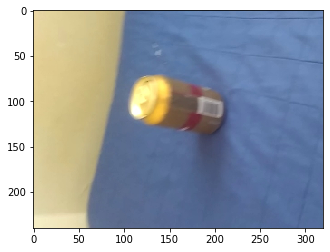


Black'                           [1 0 0 0 0 0]
DefectiveRed'                    [0 1 0 0 0 0]
DefectiveGolden'                 [0 0 1 0 0 0]
Golden'                          [0 0 0 1 0 0]
Red'                             [0 0 0 0 1 0]
DefectiveBlack'                  [0 0 0 0 0 1]

Preditions:                     [[0. 0. 0. 1. 0. 0.]]


In [8]:
Num_image = 15

inputoimage = xt[Num_image]

print(inputoimage.shape)

x = inputoimage.reshape((-1, 240, 320, 3))

imagen =  xt[Num_image]
plt.imshow(imagen)
plt.show()

print()
print("Black'                           [1 0 0 0 0 0]")
print("DefectiveRed'                    [0 1 0 0 0 0]")
print("DefectiveGolden'                 [0 0 1 0 0 0]")
print("Golden'                          [0 0 0 1 0 0]")
print("Red'                             [0 0 0 0 1 0]")
print("DefectiveBlack'                  [0 0 0 0 0 1]")

ynew = modelo.predict(x)
print()
print("Preditions:                     "+ str(np.round(ynew)))